In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from ase.build import bulk

In [4]:
from ase.optimize import BFGS, FIRE
from ase.constraints import ExpCellFilter

In [5]:
from ase.phonons import Phonons

In [6]:
import os

In [7]:
os.environ['CUDA_VISIBLE_DEVICES']='-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [8]:
from tensorpotential.calculator import TPCalculator

# Load TPCalculator

In [9]:
calc=TPCalculator("../1-fit/seed/1/saved_model/")

In [10]:
al=bulk('Al')

In [11]:
al.calc=calc

In [12]:
al.get_potential_energy()

I0000 00:00:1731621545.790202 1186103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


-3.745502602653765

In [13]:
BFGS(ExpCellFilter(al)).run()

      Step     Time          Energy         fmax
BFGS:    0 22:59:05       -3.745503        0.0630
BFGS:    1 22:59:05       -3.745644        0.0416


True

In [14]:
li=bulk('Li')

In [15]:
li.calc=calc

In [16]:
li.get_potential_energy()

-1.9118163254389078

In [17]:
BFGS(ExpCellFilter(li)).run()

      Step     Time          Energy         fmax
BFGS:    0 22:59:05       -1.911816        0.0942
BFGS:    1 22:59:05       -1.912183        0.0874
BFGS:    2 22:59:05       -1.914321        0.0070


True

# Phonons

Example from https://wiki.fysik.dtu.dk/ase/ase/phonons.html

## Al

In [18]:
! rm -rf phonon/

In [19]:
# Phonon calculator
N = 7
ph = Phonons(al, calc, supercell=(N, N, N), delta=0.05)
ph.run()

In [20]:
# Read forces and assemble the dynamical matrix
ph.read(acoustic=True)
ph.clean()

7

In [21]:
path = al.cell.bandpath( npoints=100)
bs = ph.get_band_structure(path)

dos = ph.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

Text(0.5, 0, 'DOS')

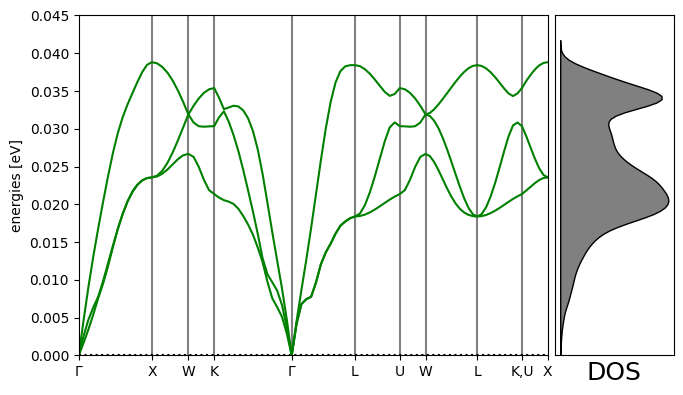

In [22]:
fig = plt.figure(1, figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.045
bs.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos.get_weights(), dos.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

## Li

In [23]:
! rm -rf phonon/

In [24]:
# Phonon calculator
N = 7
ph = Phonons(li, calc, supercell=(N, N, N), delta=0.05)
ph.run()

# Read forces and assemble the dynamical matrix
ph.read(acoustic=True)
ph.clean()

7

In [25]:
path = li.cell.bandpath( npoints=100)
bs = ph.get_band_structure(path)

dos = ph.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.327e-08*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.327e-08*i)


Text(0.5, 0, 'DOS')

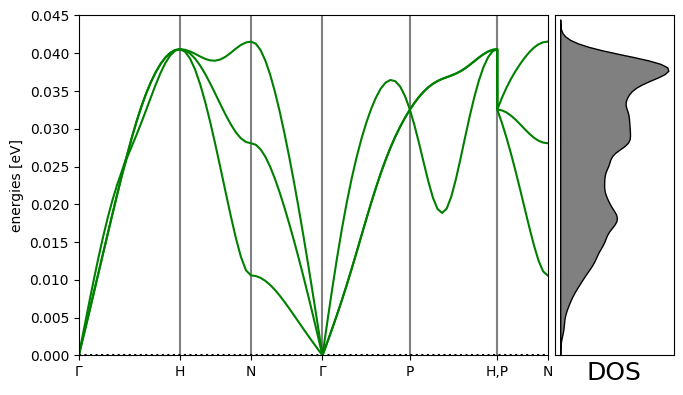

In [26]:
fig = plt.figure(1, figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.045
bs.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos.get_weights(), dos.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)